In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols

%matplotlib inline

In [2]:
def frange(start, stop, step):
    i = start
    while i < stop:
        step += step/2
        yield i
        i += step

explode = tuple((i for i in frange(0, 20, 0.01)))

In [3]:
df=pd.read_csv("data/report_anonymous_clean.csv", sep=";", encoding = 'utf8')

df['DATA_PRELIEVO'] = pd.to_datetime(df['DATA_PRELIEVO'])
df['DATA_ULTIMA_MESTRUAZIONE'] = pd.to_datetime(df['DATA_ULTIMA_MESTRUAZIONE'])
df['DATA_PAP_PRECEDENTE'] = pd.to_datetime(df['DATA_PAP_PRECEDENTE'])

# drop cols 'Unnamed 0'
df.drop(['Unnamed: 0'], axis=1, inplace=True)

df

,ETA_PRELIEVO,DATA_PRELIEVO,DATA_ULTIMA_MESTRUAZIONE,DATA_PAP_PRECEDENTE,FORNICE,PORTIO,CAN_CERV,CAV_UT,PERDITE_ER,LEUCORREA,...,CITO_PREC,VIRALE_PREC,BATT_PREC,CONTROLLO,CTRL_ISTOLOGICO,VALIDITA_CAMPIONE,CAUSA_CAMPIONE_NON_VALIDO,BATT,CITO,VIRALE
0,54,2018-04-01,NaT,NaT,False,True,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,ADEGUATO,NaN,NaN,AGC-NOS,NaN
1,49,2015-11-01,2015-10-01,NaT,False,True,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,ADEGUATO,NaN,CANDIDA,NEGATIVO,NaN
2,45,2015-07-01,2015-06-01,NaT,False,True,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,ADEGUATO,NaN,NaN,ASCUS,NaN
3,66,2016-04-01,NaT,2012-01-01,False,True,True,False,False,False,...,NEGATIVO,NaN,NaN,NaN,NaN,ADEGUATO,NaN,NaN,AGC-NOS,NaN
4,41,2016-03-01,2016-02-01,2013-01-01,False,True,True,False,False,False,...,NEGATIVO,NaN,NaN,12.0,NaN,ADEGUATO,NaN,DODERLEIN,NEGATIVO,NaN
5,24,2016-05-01,2016-04-01,NaT,False,True,True,False,False,False,...,NaN,NaN,NaN,12.0,NaN,ADEGUATO,NaN,COCCHI,NEGATIVO,NaN
6,29,2016-06-01,2016-05-01,NaT,False,True,True,False,False,True,...,NaN,NaN,NaN,12.0,NaN,ADEGUATO,NaN,COCCHI,NEGATIVO,NaN
7,27,2016-04-01,2016-03-01,NaT,False,True,True,False,False,False,...,NaN,NaN,NaN,12.0,NaN,ADEGUATO,NaN,COCCHI,NEGATIVO,NaN
8,55,2016-06-01,NaT,2016-01-01,False,True,True,False,False,False,...,NEGATIVO,HPV,NaN,12.0,NaN,NaN,NaN,COCCHI,NEGATIVO,NaN
9,33,2015-03-01,2015-02-01,NaT,False,True,True,False,False,False,...,NaN,NaN,NaN,12.0,NaN,ADEGUATO,NaN,COCCHI,NEGATIVO,NaN


In [4]:
print('number of columns: ',len(df.columns))
print(df.columns)

number of columns:  32
Index(['ETA_PRELIEVO', 'DATA_PRELIEVO', 'DATA_ULTIMA_MESTRUAZIONE',
       'DATA_PAP_PRECEDENTE', 'FORNICE', 'PORTIO', 'CAN_CERV', 'CAV_UT',
       'PERDITE_ER', 'LEUCORREA', 'PRURITO', 'TER_RAD', 'TER_ORM',
       'GRAVIDANZE', 'ABORTI', 'TEST_ESTR', 'TER_ANTIF', 'OP_GIN', 'MENOPAUSA',
       'AMENORREA', 'POST_PARTUM', 'PRIMO_PAP', 'CITO_PREC', 'VIRALE_PREC',
       'BATT_PREC', 'CONTROLLO', 'CTRL_ISTOLOGICO', 'VALIDITA_CAMPIONE',
       'CAUSA_CAMPIONE_NON_VALIDO', 'BATT', 'CITO', 'VIRALE'],
      dtype='object')


## Simple variable analysis

In [5]:
df['ETA_PRELIEVO'].describe()

count    8804.000000
mean       42.579396
std        12.502984
min        12.000000
25%        33.000000
50%        42.000000
75%        51.000000
max        88.000000
Name: ETA_PRELIEVO, dtype: float64

In [6]:
ETA_PRELIEVO = df.groupby('ETA_PRELIEVO')['ETA_PRELIEVO'].count()
print(ETA_PRELIEVO)

ETA_PRELIEVO
12      1
13      2
14      1
16      4
17      4
18     13
19     32
20     59
21     83
22    121
23    111
24    134
25    142
26    145
27    170
28    161
29    203
30    221
31    219
32    226
33    237
34    235
35    265
36    269
37    258
38    250
39    235
40    250
41    229
42    261
     ... 
58    120
59     90
60     84
61     86
62     71
63     79
64     62
65     49
66     54
67     51
68     41
69     43
70     42
71     37
72     34
73     26
74     18
75      9
76     22
77     19
78      8
79      4
80      5
81      2
82      2
83      3
84      3
85      4
87      1
88      1
Name: ETA_PRELIEVO, Length: 75, dtype: int64


In [7]:
title_eta_prelievo = 'Numero di casi per età'

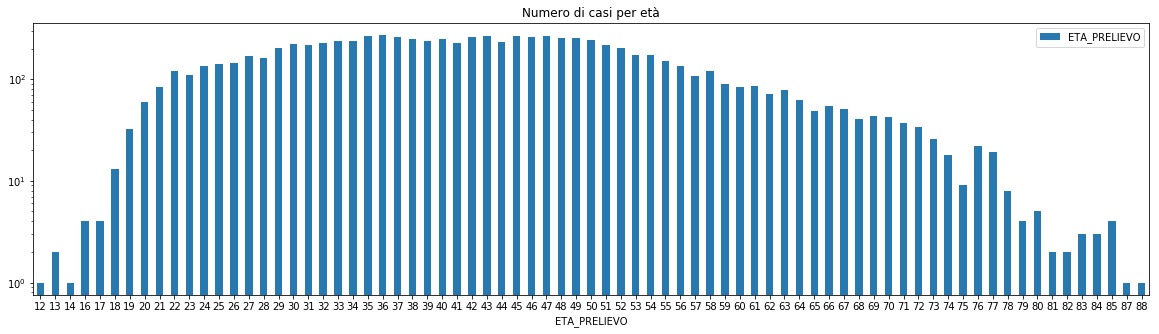

In [8]:
ETA_PRELIEVO.plot(kind='bar', title = title_eta_prelievo, figsize=(20,5), rot=0, legend=True, color='#2879b0', logy=True)

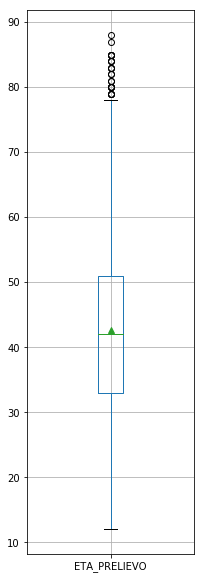

In [9]:
df.boxplot('ETA_PRELIEVO', figsize=(3,10), showmeans=True, rot=0)

In [10]:
df['DATA_PRELIEVO'].describe()

count                    8802
unique                     69
top       2014-09-01 00:00:00
freq                      220
first     2007-11-01 00:00:00
last      2018-04-01 00:00:00
Name: DATA_PRELIEVO, dtype: object

In [11]:
DATA_PRELIEVO = df['DATA_PRELIEVO'].groupby([df["DATA_PRELIEVO"].dt.year.rename('ANNO')]).count()
DATA_PRELIEVO.index = DATA_PRELIEVO.index.astype('int64')
print(DATA_PRELIEVO)

ANNO
2007       3
2010       1
2012      13
2013    1428
2014    1972
2015    1801
2016    1702
2017    1415
2018     467
Name: DATA_PRELIEVO, dtype: int64


In [12]:
title_data_prelievo = 'Numero di casi per anno'

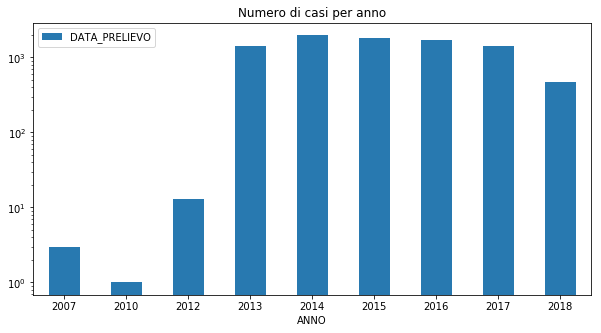

In [13]:

DATA_PRELIEVO.plot(kind='bar', title=title_data_prelievo,\
                   figsize=(10,5), rot=0, legend=True, color='#2879b0', logy=True)

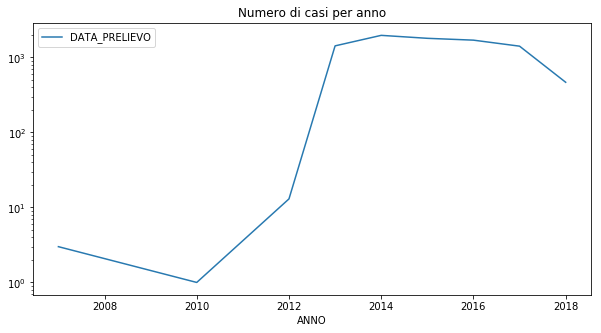

In [14]:
DATA_PRELIEVO.plot(kind='line', title= title_data_prelievo,\
                   figsize=(10,5), rot=0, legend=True, color='#2879b0', logy=True)

In [15]:
DATA_PRELIEVO_PIE = DATA_PRELIEVO.sort_values(ascending=False)[:6]
DATA_PRELIEVO_PIE

ANNO
2014    1972
2015    1801
2016    1702
2013    1428
2017    1415
2018     467
Name: DATA_PRELIEVO, dtype: int64

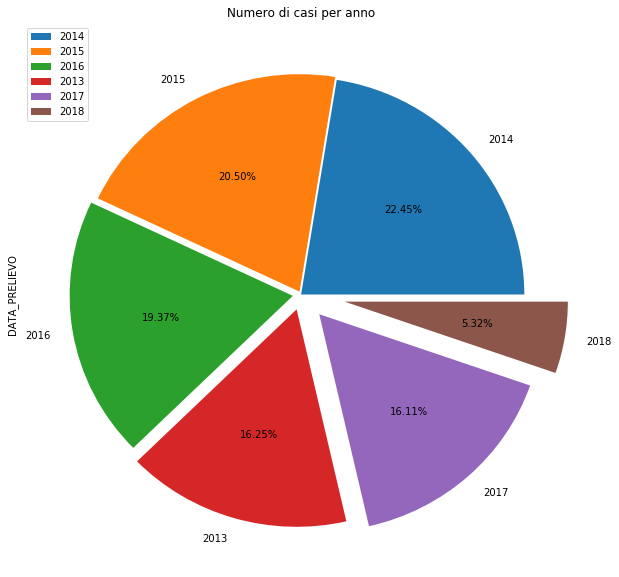

In [16]:
DATA_PRELIEVO_PIE.plot(kind='pie', figsize=(10,10), legend=True,\
                   explode = explode[:len(DATA_PRELIEVO_PIE)],\
                   title = title_data_prelievo,\
                   autopct='%1.2f%%', startangle=0)

In [17]:
DATA_PRELIEVO_YM = df['DATA_PRELIEVO']\
                        .groupby([df["DATA_PRELIEVO"].dt.year.rename('ANNO'), df["DATA_PRELIEVO"].dt.month.rename('MESE')])\
                        .count()

DATA_PRELIEVO_YM.index = pd.MultiIndex.from_tuples([(int(ix[0]), int(ix[1])) for ix in DATA_PRELIEVO_YM.index.tolist()])

print(DATA_PRELIEVO_YM)

2007  11      3
2010  4       1
2012  3       1
      11      2
      12     10
2013  1      30
      2      28
      3       3
      4     114
      5     189
      6     159
      7     146
      8      98
      9     152
      10    195
      11    156
      12    158
2014  1     136
      2     164
      3     196
      4     171
      5     180
      6     142
      7     155
      8     114
      9     220
      10    183
      11    166
      12    145
2015  1     144
           ... 
      11    143
      12    101
2016  1     138
      2     135
      3     155
      4     148
      5     217
      6     155
      7     108
      8      89
      9     177
      10    159
      11    140
      12     81
2017  1      71
      2     112
      3     139
      4      90
      5     128
      6      84
      7     128
      8     123
      9     133
      10    183
      11    142
      12     82
2018  1     156
      2     131
      3     163
      4      17
Name: DATA_PRELIEVO, Len

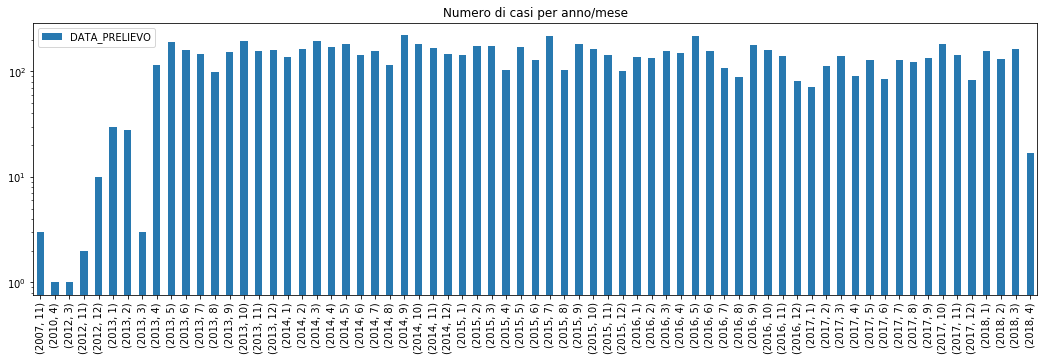

In [18]:
DATA_PRELIEVO_YM.plot(kind='bar', title = title_data_prelievo+'/mese', figsize=(18,5), rot=90,\
                      legend=True, color='#2879b0', logy=True)

In [19]:
df['GRAVIDANZE'].describe()

count    2872.000000
mean        1.755919
std         0.722312
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         8.000000
Name: GRAVIDANZE, dtype: float64

In [20]:
GRAVIDANZE = df.groupby('GRAVIDANZE')['GRAVIDANZE'].count()
GRAVIDANZE.index = GRAVIDANZE.index.astype('int64')
print(GRAVIDANZE)

GRAVIDANZE
0       2
1    1076
2    1484
3     262
4      36
5       6
6       4
7       1
8       1
Name: GRAVIDANZE, dtype: int64


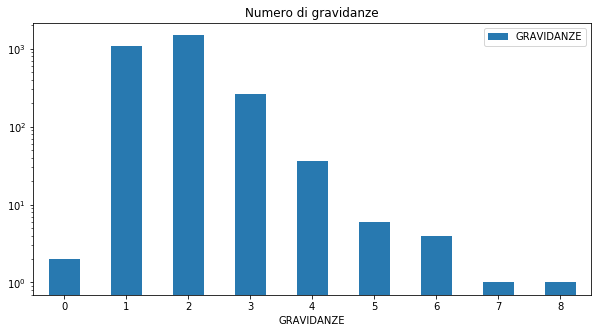

In [21]:
title_gravidanze = 'Numero di gravidanze'
GRAVIDANZE.plot(kind='bar', figsize=(10,5), title = title_gravidanze, rot=0, legend=True, color='#2879b0', logy=True)

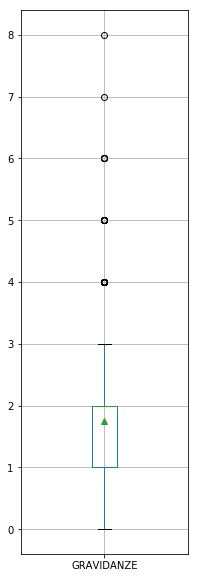

In [22]:
df.boxplot('GRAVIDANZE', figsize=(3,10), showmeans=True, rot=0)

In [23]:
GRAVIDANZE_PIE = GRAVIDANZE.sort_values(ascending=False)[:4]
GRAVIDANZE_PIE

GRAVIDANZE
2    1484
1    1076
3     262
4      36
Name: GRAVIDANZE, dtype: int64

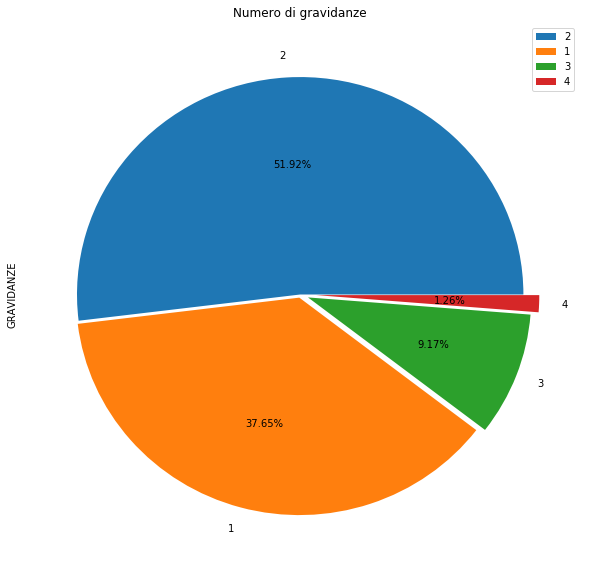

In [24]:
GRAVIDANZE_PIE.plot(kind='pie', figsize=(10,10), legend=True,\
                    explode = explode[:len(GRAVIDANZE_PIE)],\
                    title = title_gravidanze,\
                    autopct='%1.2f%%', startangle=0)

In [25]:
df['ABORTI'].describe()

count    813.000000
mean       1.399754
std        0.808727
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        8.000000
Name: ABORTI, dtype: float64

In [26]:
ABORTI = df.groupby('ABORTI')['ABORTI'].count()
ABORTI.index = ABORTI.index.astype('int64')
print(ABORTI)

ABORTI
1    595
2    151
3     42
4     13
5     11
8      1
Name: ABORTI, dtype: int64


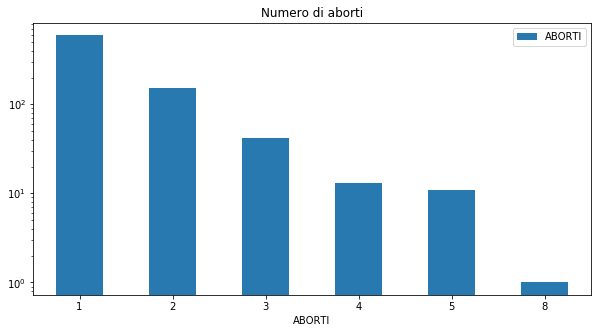

In [27]:
title_aborti = 'Numero di aborti'
ABORTI.plot(kind='bar', title = title_aborti, figsize=(10,5), rot=0, legend=True, color='#2879b0', logy=True)

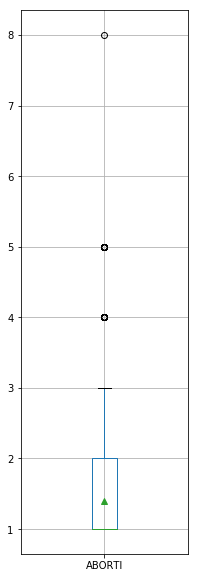

In [28]:
df.boxplot('ABORTI', figsize=(3,10), showmeans=True, rot=0)

In [29]:
ABORTI_PIE = ABORTI.sort_values(ascending=False)[:5]
ABORTI_PIE

ABORTI
1    595
2    151
3     42
4     13
5     11
Name: ABORTI, dtype: int64

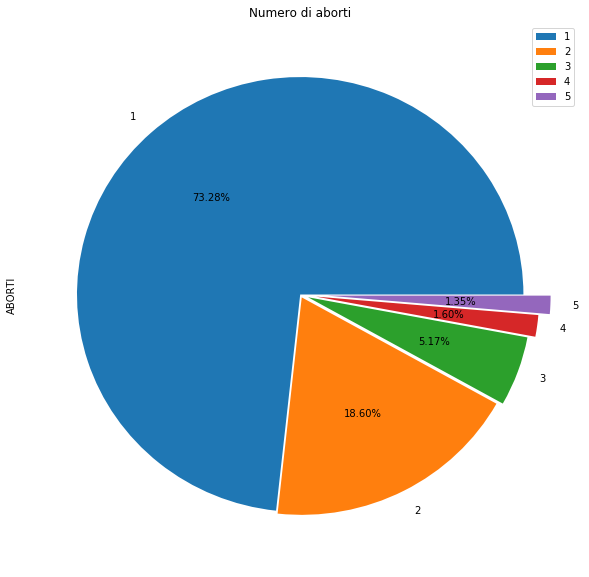

In [30]:
ABORTI_PIE.plot(kind='pie', figsize=(10,10), legend=True,\
                explode = explode[:len(ABORTI_PIE)],\
                title = title_aborti,\
                autopct='%1.2f%%', startangle=0)

In [31]:
df['PRIMO_PAP'].describe()

count     8804
unique       2
top       True
freq      6572
Name: PRIMO_PAP, dtype: object

In [32]:
PRIMO_PAP = df.groupby('PRIMO_PAP')['PRIMO_PAP'].count()
print(PRIMO_PAP)

PRIMO_PAP
False    2232
True     6572
Name: PRIMO_PAP, dtype: int64


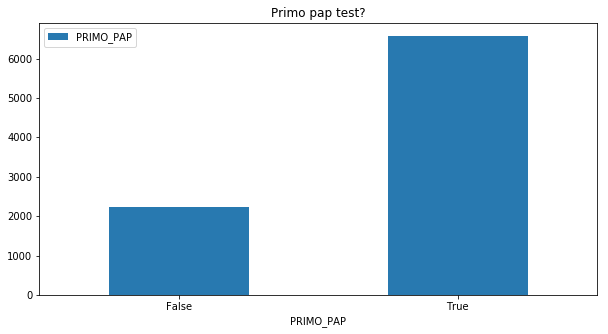

In [33]:
title_primo_pap = 'Primo pap test?'
PRIMO_PAP.plot(kind='bar', title = title_primo_pap, figsize=(10,5), rot=0, legend=True, color='#2879b0')

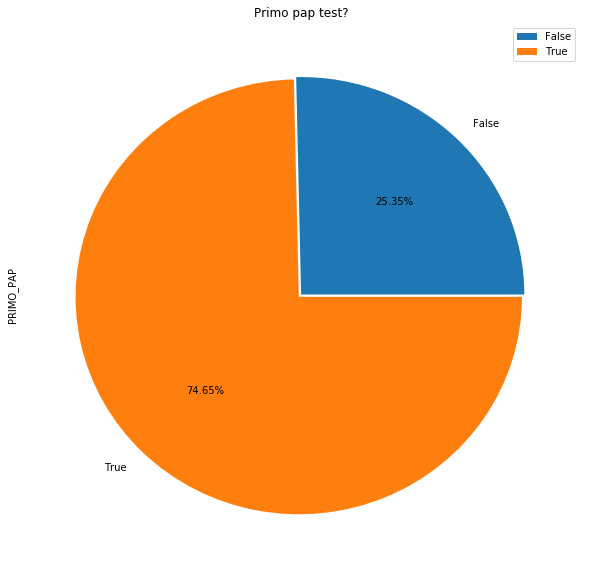

In [34]:
PRIMO_PAP.plot(kind='pie', figsize=(10,10), legend=True,\
               explode = explode[:len(PRIMO_PAP)],\
               title = title_primo_pap,
               autopct='%1.2f%%', startangle=0)

In [35]:
df['CONTROLLO'].describe()

count    8208.000000
mean       11.906433
std         0.747861
min         3.000000
25%        12.000000
50%        12.000000
75%        12.000000
max        12.000000
Name: CONTROLLO, dtype: float64

In [36]:
title_controllo = 'Incidenza di periodi di controllo'
CONTROLLO = df.groupby('CONTROLLO')['CONTROLLO'].count()
CONTROLLO.index = CONTROLLO.index.astype('int64')
print(CONTROLLO)

CONTROLLO
3        2
6      125
12    8081
Name: CONTROLLO, dtype: int64


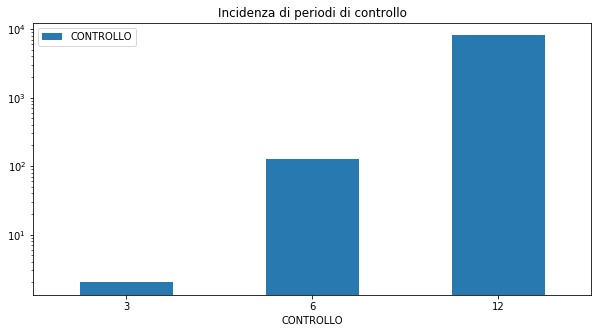

In [37]:
CONTROLLO.plot(kind='bar', title = title_controllo, figsize=(10,5), rot=0, legend=True, color='#2879b0', logy=True)

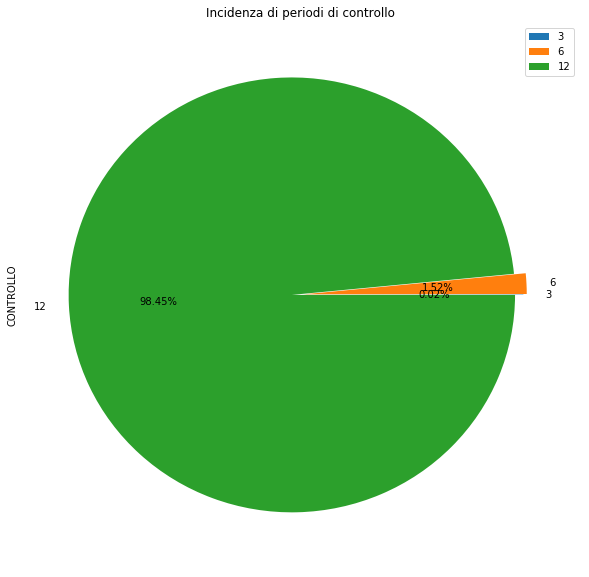

In [38]:
CONTROLLO.sort_values(ascending=False)
CONTROLLO.plot(kind='pie', figsize=(10,10), legend=True,\
               explode = explode[:len(CONTROLLO)],\
               title = title_controllo,\
               autopct='%1.2f%%', startangle=0)

In [39]:
df['VALIDITA_CAMPIONE'].describe()

count         8654
unique           3
top       ADEGUATO
freq          8624
Name: VALIDITA_CAMPIONE, dtype: object

In [40]:
VALIDITA_CAMPIONE = df.groupby('VALIDITA_CAMPIONE')['VALIDITA_CAMPIONE'].count()
print(VALIDITA_CAMPIONE)

VALIDITA_CAMPIONE
ADEGUATO       8624
INADEGUATO       28
SUBOTTIMALE       2
Name: VALIDITA_CAMPIONE, dtype: int64


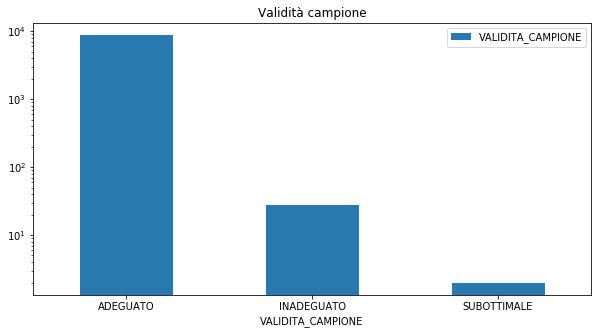

In [41]:
title_validita_campione = 'Validità campione'
VALIDITA_CAMPIONE.plot(kind='bar', title = title_validita_campione, figsize=(10,5), rot=0, legend=True, color='#2879b0', logy=True)

In [42]:
df['BATT'].describe()

count       1015
unique         9
top       COCCHI
freq         325
Name: BATT, dtype: object

In [43]:
BATT = df.groupby('BATT')['BATT'].count()
print(BATT)

BATT
ACTINOMYCES     13
CANDIDA        229
CLAMYDIA         1
COCCHI         325
DODERLEIN      228
FLOGOSI         85
GARDNERELLA      9
TRICHOMONAS      6
VAGINOSI       119
Name: BATT, dtype: int64


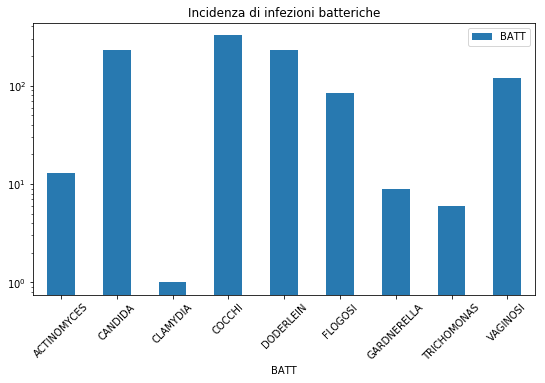

In [44]:
title_batt = 'Incidenza di infezioni batteriche'
BATT.plot(kind='bar', figsize=(9,5), title = title_batt, rot=45, legend=True, color='#2879b0', logy=True)

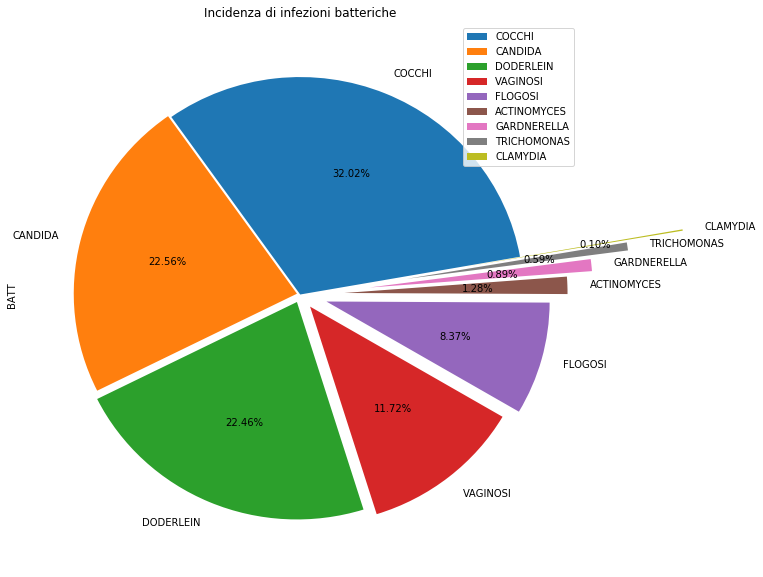

In [45]:
BATT = BATT.sort_values(ascending=False)

BATT.plot(kind='pie', figsize=(10,10), legend=True,\
          explode = explode[:len(BATT)],\
          title = title_batt,\
          autopct='%1.2f%%', startangle=10)

In [46]:
df['CITO'].describe()

count         8711
unique           9
top       NEGATIVO
freq          8447
Name: CITO, dtype: object

In [47]:
CITO = df.groupby('CITO')['CITO'].count()
print(CITO)

CITO
AGC-NEOPLASTIC       2
AGC-NOS              6
AIS                  1
ASC-H                2
ASCUS              129
HSIL                17
LSIL               106
NEGATIVO          8447
SCC                  1
Name: CITO, dtype: int64


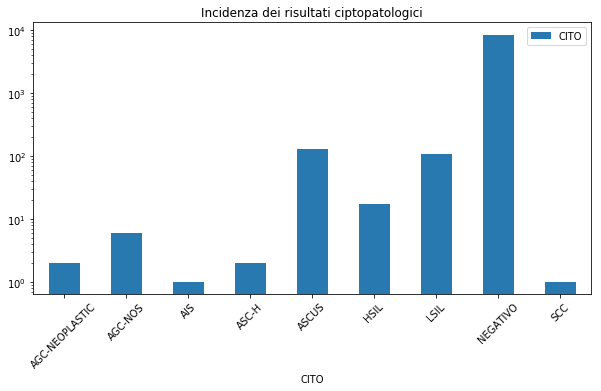

In [48]:
title_cito = 'Incidenza dei risultati ciptopatologici'
CITO.plot(kind='bar', title = title_cito, figsize=(10,5), rot=45, legend=True, color='#2879b0', logy=True)

In [49]:
CITO_PIE = CITO.sort_values(ascending=False)[:4]
CITO_PIE

CITO
NEGATIVO    8447
ASCUS        129
LSIL         106
HSIL          17
Name: CITO, dtype: int64

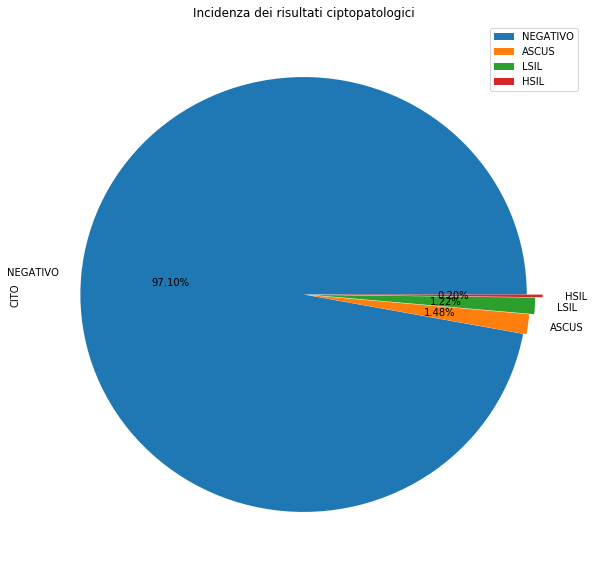

In [50]:
CITO_PIE.plot(kind='pie', figsize=(10,10), legend=True,\
              explode = explode[:len(CITO_PIE)],\
              title = title_cito,\
              autopct='%1.2f%%', startangle=0)

In [51]:
print('number of columns: ',len(df.columns))
print(df.columns)

number of columns:  32
Index(['ETA_PRELIEVO', 'DATA_PRELIEVO', 'DATA_ULTIMA_MESTRUAZIONE',
       'DATA_PAP_PRECEDENTE', 'FORNICE', 'PORTIO', 'CAN_CERV', 'CAV_UT',
       'PERDITE_ER', 'LEUCORREA', 'PRURITO', 'TER_RAD', 'TER_ORM',
       'GRAVIDANZE', 'ABORTI', 'TEST_ESTR', 'TER_ANTIF', 'OP_GIN', 'MENOPAUSA',
       'AMENORREA', 'POST_PARTUM', 'PRIMO_PAP', 'CITO_PREC', 'VIRALE_PREC',
       'BATT_PREC', 'CONTROLLO', 'CTRL_ISTOLOGICO', 'VALIDITA_CAMPIONE',
       'CAUSA_CAMPIONE_NON_VALIDO', 'BATT', 'CITO', 'VIRALE'],
      dtype='object')


In [52]:
N_PERDITE_ER = len(df[df['PERDITE_ER'] == True])
N_LEUCORREA = len(df[df['LEUCORREA'] == True])
N_PRURITO = len(df[df['PRURITO'] == True])

SINTOMI = pd.Series({'PERDITE_ER':N_PERDITE_ER,'LEUCORREA':N_LEUCORREA,'PRURITO':N_PRURITO})
SINTOMI.rename('SINTOMI', inplace=True)
print(SINTOMI)

PERDITE_ER     12
LEUCORREA     147
PRURITO         2
Name: SINTOMI, dtype: int64


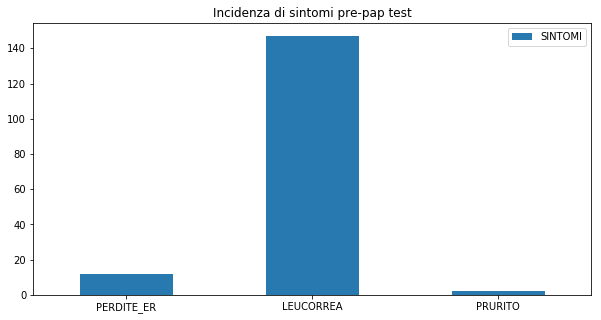

In [53]:
title_sintomi = 'Incidenza di sintomi pre-pap test'
SINTOMI.plot(kind='bar', figsize=(10,5), title = title_sintomi, legend = True, rot=0, color='#2879b0')

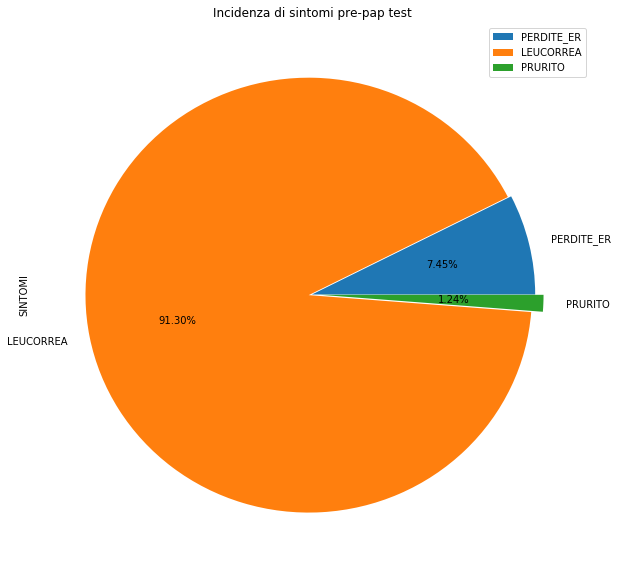

In [54]:
SINTOMI.plot(kind='pie', figsize=(10,10), legend=True,\
             explode = explode[:len(SINTOMI)],\
             title = title_sintomi,\
             autopct='%1.2f%%', startangle=0)

In [55]:
N_MENOPAUSA = len(df[df['MENOPAUSA'] == True])
N_AMENORREA = len(df[df['AMENORREA'] == True])
N_POST_PARTUM = len(df[df['POST_PARTUM'] == True])

STATI_FISIOLOGICI = pd.Series({'MENOPAUSA':N_MENOPAUSA,'AMENORREA':N_AMENORREA,'POST_PARTUM':N_POST_PARTUM})
STATI_FISIOLOGICI.rename('STATI_FISIOLOGICI', inplace=True)
print(STATI_FISIOLOGICI)

MENOPAUSA      1116
AMENORREA        39
POST_PARTUM     118
Name: STATI_FISIOLOGICI, dtype: int64


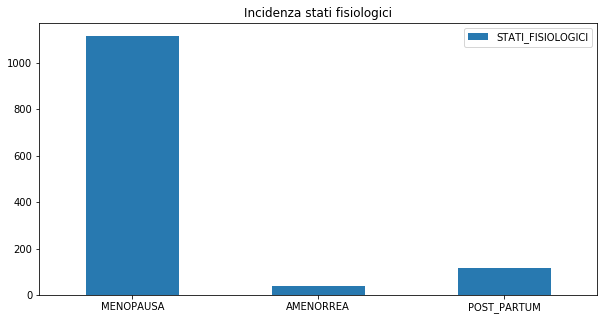

In [56]:
title_stati_fisiologici = 'Incidenza stati fisiologici'
STATI_FISIOLOGICI.plot(kind='bar', title = title_stati_fisiologici,\
                       legend = True, figsize=(10,5), rot=0, color='#2879b0')

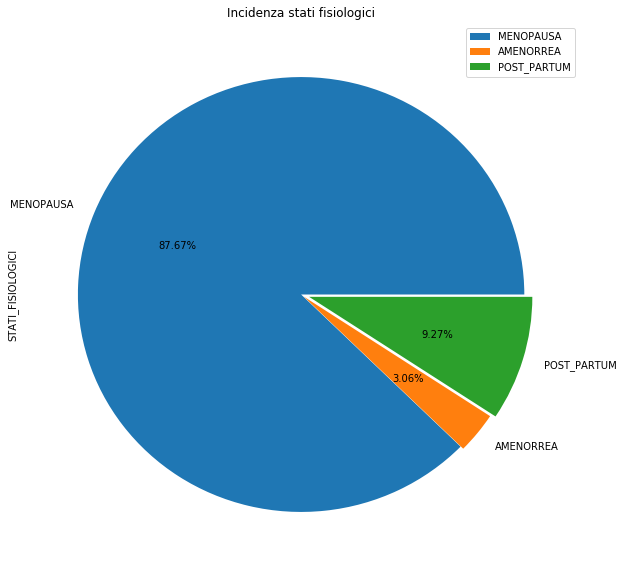

In [57]:
STATI_FISIOLOGICI.plot(kind='pie', figsize=(10,10), legend=True,\
                       explode = explode[:len(STATI_FISIOLOGICI)],\
                       title = title_stati_fisiologici,\
                       autopct='%1.2f%%', startangle=0)

In [58]:
N_FORNICE = len(df[df['FORNICE'] == True])
N_PORTIO = len(df[df['PORTIO'] == True])
N_CAN_CERV = len(df[df['CAN_CERV'] == True])
N_CAV_UT = len(df[df['CAV_UT'] == True])

TIPO_PRELIEVO = pd.Series({'FORNICE':N_FORNICE,'PORTIO':N_PORTIO,'CAN_CERV':N_CAN_CERV, 'CAV_UT': N_CAV_UT})
TIPO_PRELIEVO.rename('TIPO_PRELIEVO', inplace=True)
print(TIPO_PRELIEVO)

FORNICE        4
PORTIO      8548
CAN_CERV    8537
CAV_UT       134
Name: TIPO_PRELIEVO, dtype: int64


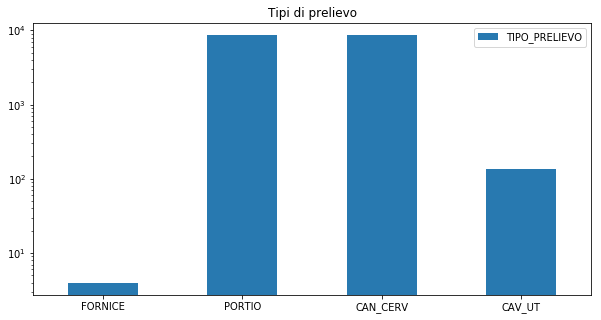

In [59]:
title_tipo_prelievo = 'Tipi di prelievo'
TIPO_PRELIEVO.plot(kind='bar', legend = True,\
                   title = title_tipo_prelievo,\
                   figsize=(10,5), rot=0, color='#2879b0', logy = True)

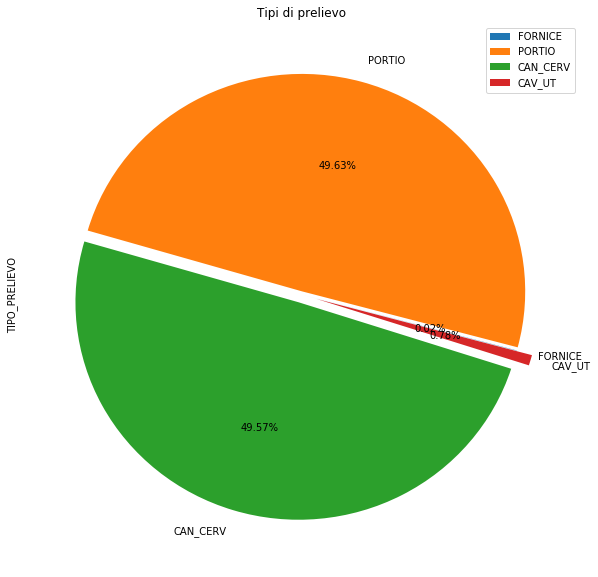

In [60]:
TIPO_PRELIEVO.plot(kind='pie', figsize=(10,10), legend=True,\
                   title = title_tipo_prelievo,\
                   explode = explode[:len(TIPO_PRELIEVO)],\
                   autopct='%1.2f%%', startangle=-15)

In [61]:
'TER_RAD', 'TER_ORM', 'OP_GIN'
N_TER_RAD = len(df[df['TER_RAD'] == True])
N_TER_ORM = len(df[df['TER_ORM'] == True])
N_OP_GIN = len(df[df['OP_GIN'] == True])

DATI_OBIETTIVI = pd.Series({'TER_RAD':N_TER_RAD,'TER_ORM':N_TER_ORM,'OP_GIN':N_OP_GIN})
DATI_OBIETTIVI.rename('DATI_OBIETTIVI', inplace=True)
print(DATI_OBIETTIVI)

TER_RAD       4
TER_ORM     422
OP_GIN     1408
Name: DATI_OBIETTIVI, dtype: int64


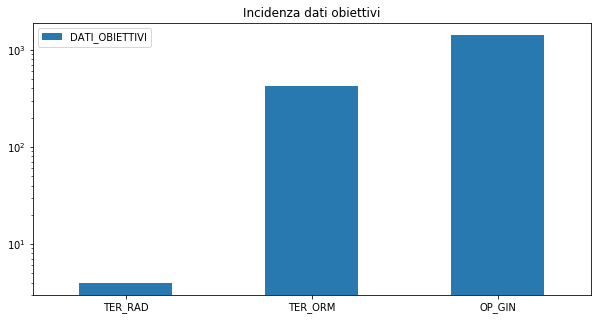

In [62]:
title_dati_obiettivi = 'Incidenza dati obiettivi'
DATI_OBIETTIVI.plot(kind='bar',legend = True,\
                    title = title_dati_obiettivi,\
                    figsize=(10,5), rot=0, color='#2879b0', logy = True)

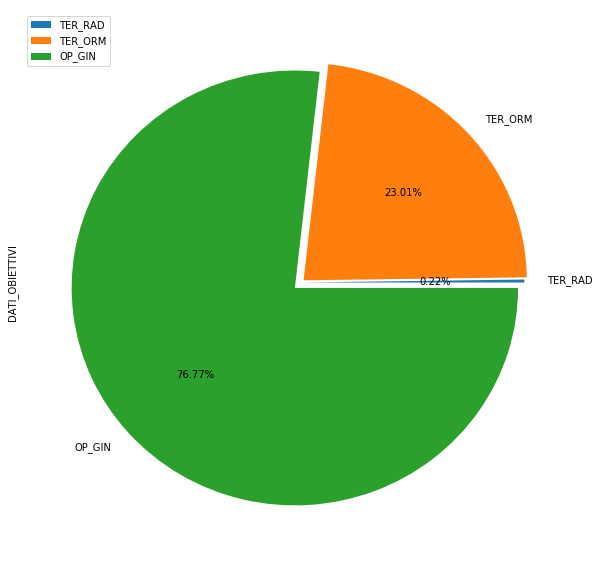

In [63]:
DATI_OBIETTIVI.plot(kind='pie', figsize=(10,10), legend=True,\
                explode = explode[:len(DATI_OBIETTIVI)],\
                autopct='%1.2f%%', startangle=0)

In [64]:
N_TEST_ESTR = len(df[df['TEST_ESTR'] == True])
N_TER_ANTIF = len(df[df['TER_ANTIF'] == True])

TEST_CONSIGLIATI = pd.Series({'TEST_ESTR':N_TEST_ESTR,'TER_ANTIF':N_TER_ANTIF})
TEST_CONSIGLIATI.rename('TEST_CONSIGLIATI', inplace=True)
print(TEST_CONSIGLIATI)

TEST_ESTR      4
TER_ANTIF    416
Name: TEST_CONSIGLIATI, dtype: int64


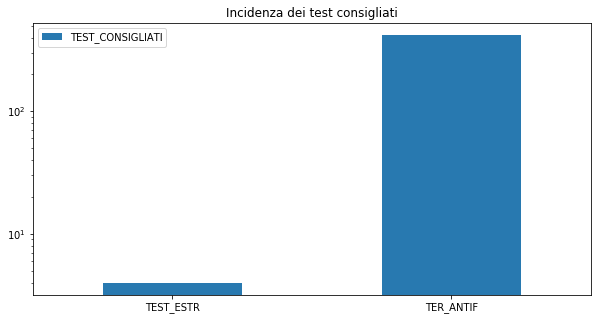

In [65]:
title_test_consigliati = 'Incidenza dei test consigliati'
TEST_CONSIGLIATI.plot(kind='bar', legend = True,\
                      title = title_test_consigliati,\
                      figsize=(10,5), rot=0, color='#2879b0', logy = True)

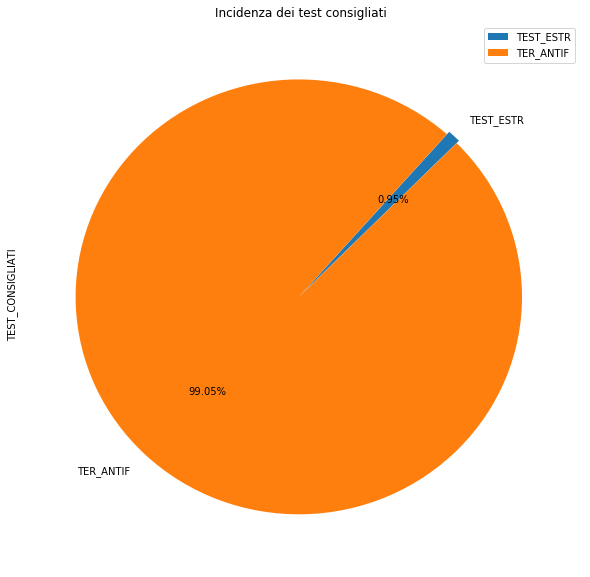

In [66]:
TEST_CONSIGLIATI.plot(kind='pie', figsize=(10,10), legend=True,\
                      title = title_test_consigliati,\
                      explode = explode[:len(TEST_CONSIGLIATI)],\
                      autopct='%1.2f%%', startangle=45)

In [67]:
DELTA_PREL_MESTR = pd.DataFrame({'ID': [i for i in range(8804)], 'DELTA': df['DATA_PRELIEVO'] - df['DATA_ULTIMA_MESTRUAZIONE']})
DELTA_PREL_MESTR.dropna(inplace=True)
DELTA_PREL_MESTR['DELTA'] = DELTA_PREL_MESTR['DELTA'].astype('timedelta64[M]')
DELTA_PREL_MESTR['DELTA'].describe()

count    5075.000000
mean        1.044335
std         6.953461
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       277.000000
Name: DELTA, dtype: float64

In [68]:
DELTA_PREL_MESTR = DELTA_PREL_MESTR.groupby('DELTA')['ID'].count()
DELTA_PREL_MESTR.rename('DELTA (PRELIEVO - ULTIMA MESTR.)', inplace=True)
DELTA_PREL_MESTR.index = DELTA_PREL_MESTR.index.astype('int64')
DELTA_PREL_MESTR

DELTA
0      3313
1      1320
2       191
3        57
4        39
5        27
6        16
7         7
8         7
9        11
10       11
11       10
12        1
13        8
14        5
15        5
16        2
17        4
18        3
19        1
20        1
22        5
23        1
24        2
25        1
27        3
28        1
32        1
33        2
34        4
44        1
45        1
50        1
61        1
65        1
68        1
73        1
82        1
91        1
96        1
97        1
119       2
120       1
206       1
277       1
Name: DELTA (PRELIEVO - ULTIMA MESTR.), dtype: int64

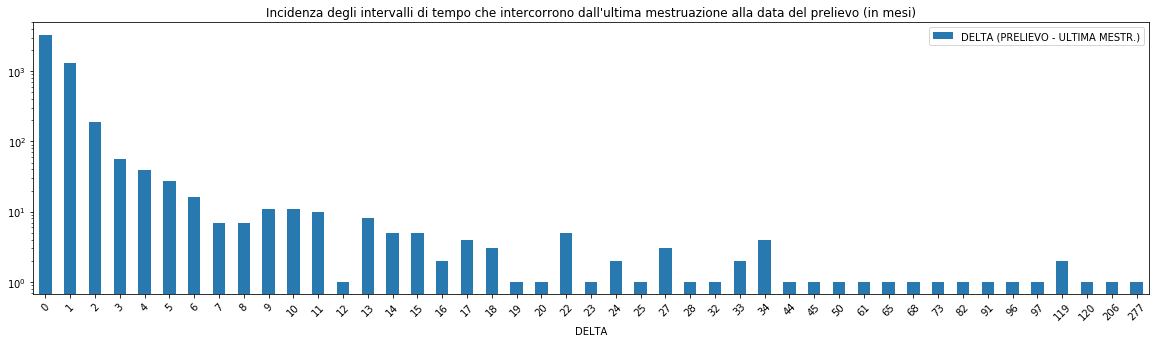

In [69]:
title_delta_prel_mestr = 'Incidenza degli intervalli di tempo che intercorrono dall\'ultima mestruazione alla data del prelievo (in mesi)'
DELTA_PREL_MESTR.plot(kind='bar', figsize=(20,5),\
                      title = title_delta_prel_mestr,\
                      legend = True, rot=45, color='#2879b0', logy = True)

In [70]:
df.columns

Index(['ETA_PRELIEVO', 'DATA_PRELIEVO', 'DATA_ULTIMA_MESTRUAZIONE',
       'DATA_PAP_PRECEDENTE', 'FORNICE', 'PORTIO', 'CAN_CERV', 'CAV_UT',
       'PERDITE_ER', 'LEUCORREA', 'PRURITO', 'TER_RAD', 'TER_ORM',
       'GRAVIDANZE', 'ABORTI', 'TEST_ESTR', 'TER_ANTIF', 'OP_GIN', 'MENOPAUSA',
       'AMENORREA', 'POST_PARTUM', 'PRIMO_PAP', 'CITO_PREC', 'VIRALE_PREC',
       'BATT_PREC', 'CONTROLLO', 'CTRL_ISTOLOGICO', 'VALIDITA_CAMPIONE',
       'CAUSA_CAMPIONE_NON_VALIDO', 'BATT', 'CITO', 'VIRALE'],
      dtype='object')

In [71]:
CROSS_DATA_PRELIEVO_CITO = pd.DataFrame(df[['DATA_PRELIEVO', 'CITO']])
CROSS_DATA_PRELIEVO_CITO['DATA_PRELIEVO'] = CROSS_DATA_PRELIEVO_CITO['DATA_PRELIEVO'].apply(lambda x: x.year if isinstance(x, pd.Timestamp) else np.NaN)
CROSS_DATA_PRELIEVO_CITO['DATA_PRELIEVO'] = CROSS_DATA_PRELIEVO_CITO[CROSS_DATA_PRELIEVO_CITO['DATA_PRELIEVO'] > 2012]
CROSS_DATA_PRELIEVO_CITO.head()

,DATA_PRELIEVO,CITO
0,2018,AGC-NOS
1,2015,NEGATIVO
2,2015,ASCUS
3,2016,AGC-NOS
4,2016,NEGATIVO


In [72]:
CROSS_DATA_PRELIEVO_CITO = CROSS_DATA_PRELIEVO_CITO.groupby(['DATA_PRELIEVO', 'CITO'])['CITO'].count()
CROSS_DATA_PRELIEVO_CITO.rename('CITOLOGICI PER ANNO')
CROSS_DATA_PRELIEVO_CITO.index = pd.MultiIndex.from_tuples([(int(ix[0]), ix[1]) for ix in CROSS_DATA_PRELIEVO_CITO.index.tolist()])
CROSS_DATA_PRELIEVO_CITO

2013  ASCUS               13
      LSIL                11
      NEGATIVO          1393
2014  AIS                  1
      ASC-H                1
      ASCUS               24
      HSIL                 2
      LSIL                22
      NEGATIVO          1906
2015  ASCUS               16
      HSIL                 5
      LSIL                27
      NEGATIVO          1737
      SCC                  1
2016  AGC-NEOPLASTIC       1
      AGC-NOS              5
      ASC-H                1
      ASCUS               43
      HSIL                 6
      LSIL                25
      NEGATIVO          1601
2017  AGC-NEOPLASTIC       1
      ASCUS               26
      HSIL                 1
      LSIL                13
      NEGATIVO          1351
2018  AGC-NOS              1
      ASCUS                7
      HSIL                 3
      LSIL                 7
      NEGATIVO           442
Name: CITO, dtype: int64

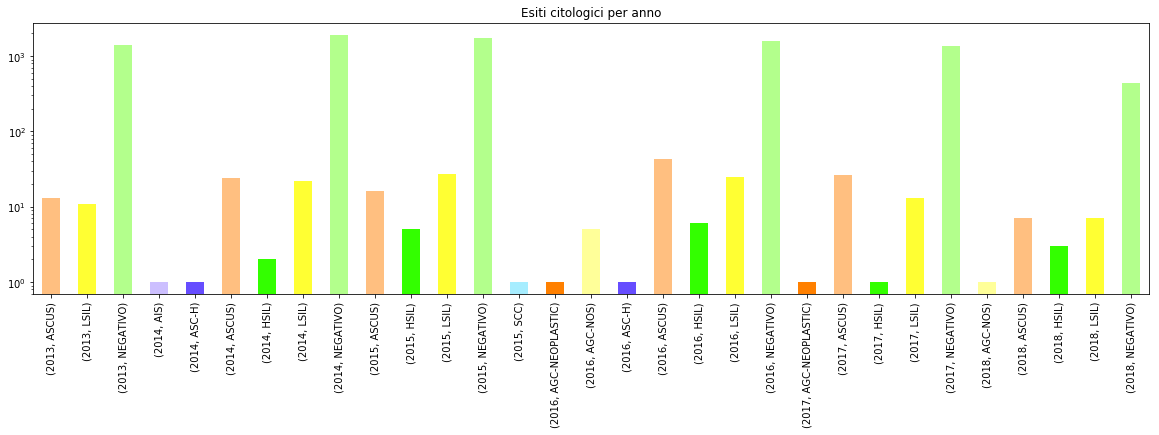

In [73]:
title_croos_data_prelievo_cito = 'Esiti citologici per anno'

CATEGORICAL_COLORS = [(1.000,0.750,0.500),
                      (1.000,1.000,0.200),
                      (0.700,1.000,0.550),
                      (0.800,0.750,1.000),
                      (0.400,0.300,1.000),
                      (0.200,1.000,0.000),
                      (0.650,0.930,1.000),
                      (1.000,0.500,0.000),
                      (1.000,1.000,0.600),
                      (0.100,0.700,1.000),
                      (1.000,0.600,0.750),
                      (0.900,0.100,0.200)]

colors = {ix: '' for ix in CROSS_DATA_PRELIEVO_CITO.index.tolist()}
i = 0
for ix in CROSS_DATA_PRELIEVO_CITO.index.tolist():
    c = None
    for key in colors.keys():
        if key[1] == ix[1] and colors[key] != '':
            c = colors[key]
            break
    if c == None:
        colors[ix] = CATEGORICAL_COLORS[i]
        i += 1
    else:
        colors[ix] = c
        
CROSS_DATA_PRELIEVO_CITO.plot(kind='bar', legend = False,\
                              title = title_croos_data_prelievo_cito,\
                              color = colors.values(),\
                              figsize=(20,5), rot=90, logy = True)